In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [15]:
file_path = "../eta-pi-data/merged_NCPi0.h5"
# file_path = "../eta-pi-data/merged_Eta.h5"
with h5py.File(file_path, 'r', locking=False) as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))
    # If your data is nested, explore further
    # for key in f.keys():
    #     if isinstance(f[key], h5py.Group):
    #         print(f"  Subkeys in {key}:", list(f[key].keys()))

    # Example: print shape of a known dataset (replace 'points_data' with your actual key)
    if 'spacepoints_table' in f:
        print(f"Shape of 'points_data': {f['points_data'].shape}")
        print(f"Type of 'points_data': {f['points_data'].dtype}")
    # Identify how labels/classes are stored
    if 'labels' in f:
        print(f"Shape of 'labels': {f['labels'].shape}")

    sp = f['spacepoint_table']

    current_index = [0, 0, 0]
    current_num_points = 0
    num_points = []
    print(len(sp['event_id']))
    for a in sp['event_id'][:-1]:
        if a[0] == current_index[0] and a[1] == current_index[1] and a[2] == current_index[2]:
            current_num_points += 1
        else:
            # print(current_num_points)
            num_points.append(current_num_points)
            current_num_points = 1
            current_index = a
        # print(current_num_points)

num_points = num_points[1:-1] # Remove first zero



Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
54259683


7504
106906


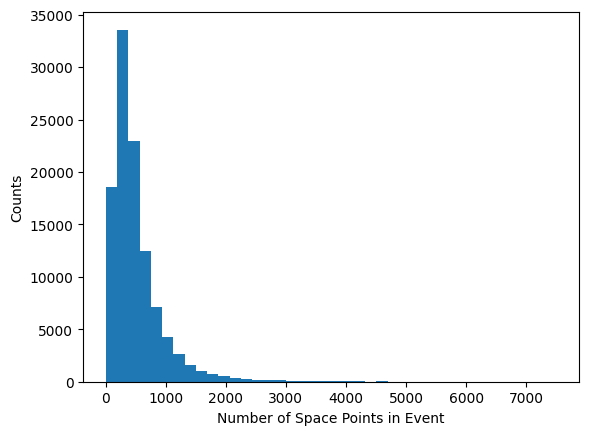

In [16]:
print(max(num_points))
print(len(num_points))

fig, ax= plt.subplots()
ax.hist(num_points, 40)
ax.set_xlabel(f'Number of Space Points in Event')
ax.set_ylabel(f'Counts')
plt.show()